In [34]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data = []
with open('speedtest.json', 'r') as file:
    i = 0
    for line in file:        
        try:
            entry = json.loads(line)
            data.append(entry)
        except:
            print(f'Error in line:{i}')
            print(line)
        i += 1

df = pd.DataFrame(data)
df = pd.json_normalize(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [37]:
# Convert the 'timestamp' column to datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['download.norm'] = df['download.bandwidth'] * 8 / (1000 * 1000)
df['upload.norm'] = df['upload.bandwidth'] * 8 / (1000 * 1000)
# Sort the DataFrame by timestamp
df = df.sort_values('timestamp')

In [38]:
def visualize(df, column, title):    
    # Apply rolling average smoothing to the 'bandwidth' column
    window_size = 12  # Adjust the window size as desired
    rolling_median = df[column].rolling(window=window_size, min_periods=1).median()
    time = df['timestamp']
    rolling_mean = df[column].rolling(window=window_size, min_periods=1).mean()
    rolling_std = df[column].rolling(window=window_size, min_periods=1).std()
    rolling_max = df[column].rolling(window=window_size, min_periods=1).max()
    rolling_min = df[column].rolling(window=window_size, min_periods=1).min()

    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Create a line plot using seaborn
    sns.lineplot(x='timestamp', y=rolling_median, data=df)
    
    # Plot the shaded region representing the rolling standard deviation using Matplotlib
    plt.fill_between(df['timestamp'], rolling_mean-rolling_std, rolling_max,
                 color='gray', alpha=0.3, label='Rolling Std')    


    # Set labels and title
    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.title(title)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=75)

    # Display the plot
    plt.show()

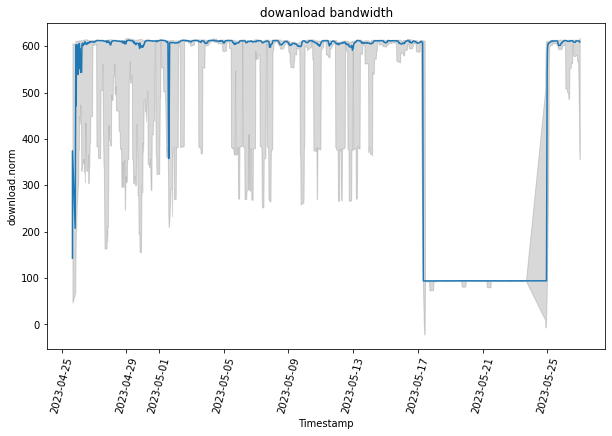

In [40]:
visualize(df, 'download.norm', "dowanload bandwidth")

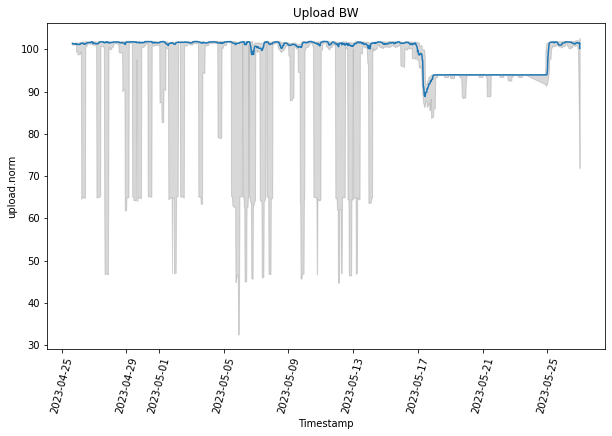

In [41]:
visualize(df, 'upload.norm', "Upload BW")

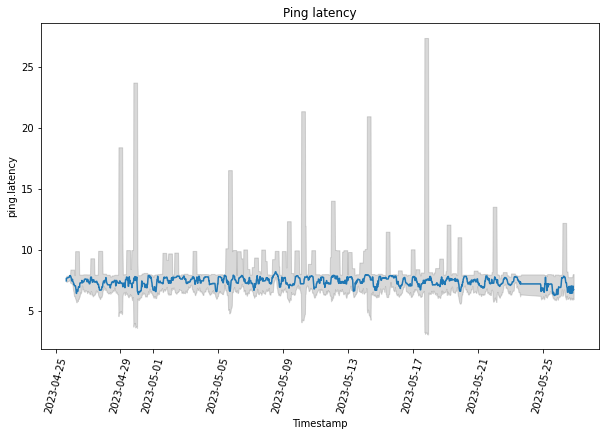

In [7]:
visualize(df, 'ping.latency', "Ping latency")